<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 2

Partners: Brian Janger, Matthew Wang, Caleb Watson

### Problem 0 (3 points)

## Part 1: Volumes in Many Dimensions

### Problem 1.1 (Exam Style)

The volume of a compact set can be expressed as $\int_{A} 1 \,dA$.

Thus, $c(d,a)$ of $C(d,a)$ can be written as $a^d$ when integrating over $d$ dimensions. Therefore, $c(d,1)$ is $1^d$ which is $1$ for all possible values of $d$. 

### Problem 1.2 (Exam Style)

The volume $e(d,\epsilon)$ of $E(d,\epsilon)$ can be written as $c(d,1) - c(d,1-\epsilon)$, which is $1-(1-\epsilon)^d$.

### Problem 1.3 (Exam Style)

$e(d,\epsilon) = 1 - (1-\epsilon)^d$

$e(d,\epsilon) = 1 - (1+(\text{-}\epsilon))^d$

$e(d,\epsilon) = 1 - ({d \choose 0}\epsilon^0 + {d \choose 1}(\text{-}\epsilon)^1 + \ldots)$ by binomial expansion

$e(d,\epsilon) = 1 - (1 - d\epsilon)$

$e(d,\epsilon) = d*\epsilon$

Given the expression in problem 1.2 was defined using the unit cube, we may say that $d = 1/\epsilon$ when the $\epsilon$-skin takes up all of the cube's volume. 

### Problem 1.4 (Exam Style)

Text(0, 0.5, 'E-Skin Volume')

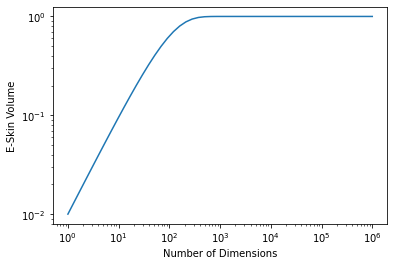

In [1]:
from matplotlib import pyplot as plt
import numpy as np

volume = []

def edge_volume(dimension, epsilon):
    return 1 - np.power(1-epsilon, dimension)   

logspace = np.logspace(0,6)
for element in logspace:
    volume.append(edge_volume(element, 10E-3))

plt.loglog(logspace, np.array(volume))
plt.xlabel('Number of Dimensions')
plt.ylabel('E-Skin Volume')

Given the previously derived expression, the number of dimensions required for the $\epsilon$-skin to take up all of the cube's volume would be $10^{3}$, such that $\epsilon * d$ equals 1. Our approximation is close to the desired $d$ value, given the above curve reaches 1 between $10^{2}$ and $10^{3}$ dimensions. 

## Part 2: Voronoi Geometry 

### Problem 2.1 (Exam Style)

For line $l_{pq}$

$
||p-x||^2=||q-x||^2
$

$
l_{pq}=2(q-p)^{T}x+p^{T}p-q^{T}q=0
$

The same can be done for $l_{pr}$ and $l_{qr}$

$
l_{pr}: 2(r-p)^{T}x+p^{T}p-r^{T}r=0
$

$
l_{qr}: 2(r-q)^{T}x+q^{T}q-r^{T}r=0
$

For z, we set any of the two lines equal to each other to find the intersection.

$
2
\begin{bmatrix}
(q-p)^T\\
(r-p)^T
\end{bmatrix}
x=
\begin{bmatrix}
-p^Tp+q^Tq\\
-p^Tp+r^Tr
\end{bmatrix}
$

$
A=
2
\begin{bmatrix}
(q-p)^T\\
(r-p)^T
\end{bmatrix}
$
and 
$
b=
\begin{bmatrix}
-p^Tp+q^Tq\\
-p^Tp+r^Tr
\end{bmatrix}
$

$
z=
\frac{1}{2}
\begin{bmatrix}
(q-p)^T\\
(r-p)^T
\end{bmatrix}^{-1}
\begin{bmatrix}
-p^Tp+q^Tq\\
-p^Tp+r^Tr
\end{bmatrix}
$

If the points are lined up, then the vectors in matrix $A$, $(q-p)$ and $(r-p)$ for example, are pointing to the same direction. This means that the rows are not linear independent and therefore NOT nonsingular. Geometrically, this means that the voronoi lines are parallel and never cross each other. 


The algebra shows that the three lines meet at a single point. When I set $l_{pq}=l_{qr}$ and reduce, I get $l_{pr}$. 

### Problem 2.2

In [2]:
import numpy as np

test_points = np.array(
    [
        [[2., 0.], [0., 3.], [-4., -1.]],
        [[0., 0.], [0., 2.], [3., 0.]],
        [[-4., -1.], [3., 3.], [0. ,0.]]
    ]
)

In [3]:
from matplotlib import pyplot as plt
import math

def voronoi_3(points):
    p = points[0]
    q = points[1]
    r = points[2]
    
    inv = np.linalg.inv(np.array([q-p,r-p]))
    other = np.array([-np.dot(p,p)+np.dot(q,q),-np.dot(p,p)+np.dot(r,r)])
    
    # define z and u
    z = (1/2)*np.dot(inv,other) 
    
    u = []
    combine = np.array([p, q, r])
            
            
    for i in range(len(combine)):
        for j in range(i+1, len(combine)):
            # if y values are the same, put a vertical line
            if combine[i][1]==combine[j][1]:
                u.append(np.array([0,1]))
            # if x values are the same, put a horizontal line
            elif combine[i][0]==combine[j][0]:
                u.append(np.array([1,0]))
            else:
                point_slope = (combine[i][1]-combine[j][1])/(combine[i][0]-combine[j][0])
                slope = -1/point_slope
                vector = np.array([1,slope])
                u.append(vector/math.sqrt(np.dot(vector,vector)))
    
    return z,u

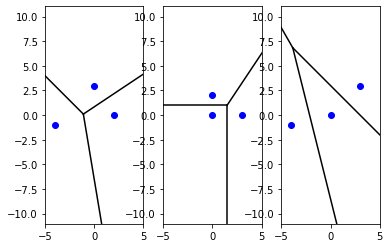

In [4]:
def draw_voronoi_3(points, z, u):
    plt.axis('equal')
    plt.axis([-5,5,-5,5])
    
    #plt.plot(z[0], z[1], 'bo')
    
    # plotting the individual points p,q,r
    plt.plot(point[0][0],point[0][1],'bo')
    plt.plot(point[1][0],point[1][1],'bo')
    plt.plot(point[2][0],point[2][1],'bo')
    
    #plotting pq line
    if np.dot(z+u[0]-point[2],z+u[0]-point[2]) < np.dot(z+u[0]-point[0],z+u[0]-point[0]): u[0]*=-1
    linspace = np.linspace(0,100,2)
    pts_x = z[0] + linspace*u[0][0]
    pts_y = z[1] + linspace*u[0][1]
    plt.plot(pts_x,pts_y,'k')
    
    #plotting pr line
    if np.dot(z+u[1]-point[1],z+u[1]-point[1]) < np.dot(z+u[1]-point[0],z+u[1]-point[0]): u[1]*=-1
    linspace = np.linspace(0,100,2)
    pts_x = z[0] + linspace*u[1][0]
    pts_y = z[1] + linspace*u[1][1]
    plt.plot(pts_x,pts_y,'k')
    
    #plotting qr line
    if np.dot(z+u[2]-point[0],z+u[2]-point[0]) < np.dot(z+u[2]-point[1],z+u[2]-point[1]): u[2]*=-1
    linspace = np.linspace(0,100,2)
    pts_x = z[0] + linspace*u[2][0]
    pts_y = z[1] + linspace*u[2][1]
    plt.plot(pts_x,pts_y,'k')

i = 1
for point in test_points:
    z,u = voronoi_3(point)
    plt.subplot(1, 3, i)
    draw_voronoi_3(point,z,u)
    i += 1

## Part 3: Nearest Neighbor Regression 

In [5]:
from urllib.request import urlretrieve
from os import path as osp
import pickle


def retrieve(file_name, semester='fall22', course='371', homework=2):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [6]:
file_name = 'ames.pickle'
retrieve(file_name)
with open(file_name, 'rb') as file:
    ames = pickle.load(file)

Using previously downloaded file ames.pickle


### Problem 3.1

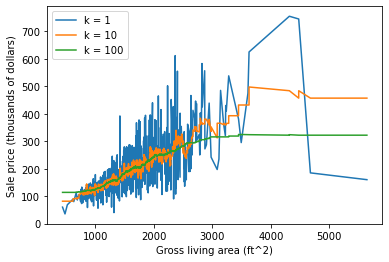

In [7]:
from sklearn.neighbors import NearestNeighbors

k_neighbors = [1, 10, 100] # k-neighbors of interest

plt.figure()
# for plotting points, just to check for correctness 
#plt.plot(ames['X'], ames['y'], 'o') 
combine = list(zip(ames['X'].flatten(),ames['y']))
for k in k_neighbors:
    result = [] # containing kNN results
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(ames['X']) # home areas: independent variable
    areas = [x for x in range(6001)]
    twod_areas = np.reshape(areas, (-1, 1))
    distances, indices = neigh.kneighbors(twod_areas)
    for point in indices:
        sum = 0
        ref_point = point[0]
        for index in point:
            sum += (combine[index][1])
        average = sum/len(point)
        knn_point = (combine[ref_point][0], average)
        result += [knn_point]
    result.sort()
    x_values = [tuple[0] for tuple in result]
    y_values = [tuple[1] for tuple in result]
    plt.plot(x_values, y_values, label="k = %d" % k)
    plt.xlabel("Gross living area (ft^2)")
    plt.ylabel("Sale price (thousands of dollars)")
plt.legend()   

### Problem 3.2

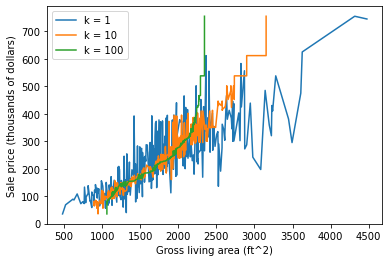

In [8]:
plt.figure()
# for plotting points, just to check for correctness 
# plt.plot(ames['X'], ames['y'], 'o') 
combine = list(zip(ames['X'].flatten(),ames['y']))
for k in k_neighbors:
    result = [] # containing kNN results
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(np.reshape(ames['y'], (-1,1))) # home prices: independent variable
    prices = [y for y in range(801)]
    twod_prices = np.reshape(prices, (-1, 1))
    distances, indices = neigh.kneighbors(twod_prices)
    for point in indices:
        sum = 0
        ref_point = point[0]
        for index in point:
            sum += (combine[index][0])
        average = sum/len(point)
        knn_point = (average, combine[ref_point][1])
        result += [knn_point]
    result.sort()
    x_values = [tuple[0] for tuple in result]
    y_values = [tuple[1] for tuple in result]
    plt.plot(x_values, y_values, label="k = %d" % k)
    plt.xlabel("Gross living area (ft^2)")
    plt.ylabel("Sale price (thousands of dollars)")
plt.legend()   

### Problem 3.3 (Exam Style)

From the previous two plots it appears that the k-NN regressors are poor extrapolators, given the flattening of the curves at the beginning and ends corresponding to input values outside the bounds of those found in the training set. The observed flattening is due to less variability amongst the k nearest neighbors for those points outside the values of the training set. This is because if we keep picking points further outside of the extreme values of the independent variable, then the k-nearest neighbors will still be the same, so our prediction will be the same! Thus, we can't extrapolate using k-NN regressors.
(This is also why the curves for k-NN flatten - if our predictions for more and more extreme values of the independent variable are the same, then the curve must appear flat as our dependent variable will have the same value for all extreme values of the independent variable).

The k-NN regressor predictions are better than the predictions given by polynomial fitting in the sense that k-NN allows us to fit a function with some strucutre without knowing exactly what the structure of the function is. By reading the "nearest neighbors" to any point in the training set, the k-NN approach allows us to be very adaptible to different shapes of the true function $f$ we are trying to model, which can make our predictions a lot better without the need for lots of training data (as per the curse of dimensionality).

## Part 4: Nearest-Neighbor Density Estimation 

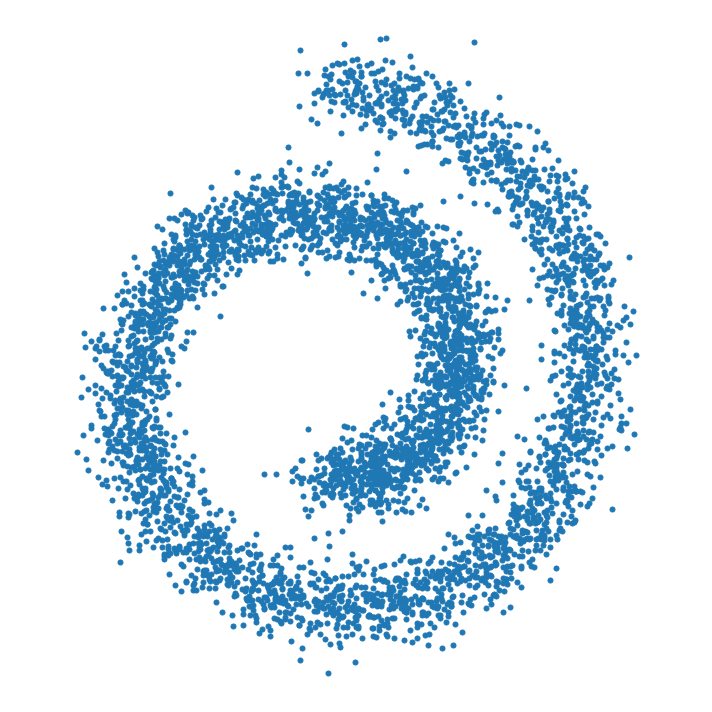

In [9]:
from sklearn.datasets import make_swiss_roll

%matplotlib inline
import matplotlib.pyplot as plt

n_training_samples, noise = 5000, 1.
roll = make_swiss_roll(n_training_samples, noise=noise)[0][:, (0, 2)]
x_roll, y_roll = roll[:, 0], roll[:, 1]

plt.figure(figsize=(10, 10), tight_layout=True)
plt.plot(x_roll, y_roll, '.', ms=10)
plt.axis('equal')
plt.axis('off')
plt.show()

### Problem 4.1

In [10]:
n_plot_samples = 200
margin = 0.01
x_bounds = (1 + margin) * np.array([x_roll.min(), x_roll.max()])
y_bounds = (1 + margin) * np.array([y_roll.min(), y_roll.max()])
x_grid = np.linspace(x_bounds[0], x_bounds[1], n_plot_samples)
y_grid = np.linspace(y_bounds[0], y_bounds[1], n_plot_samples)
xx_grid, yy_grid = np.meshgrid(x_grid, y_grid)
queries = np.stack((xx_grid.ravel(), yy_grid.ravel()), axis=1)

In [11]:
def show_density(den):
    den = np.reshape(den, (n_plot_samples, n_plot_samples))
    n_levels = 20
    levels = np.linspace(0, den.max(), n_levels)
    plt.figure(figsize=(10, 10), tight_layout=True)
    plt.contourf(x_grid, y_grid, den, levels=levels, cmap=plt.cm.Reds)
    plt.axis('equal')
    plt.axis('off')
    plt.show()

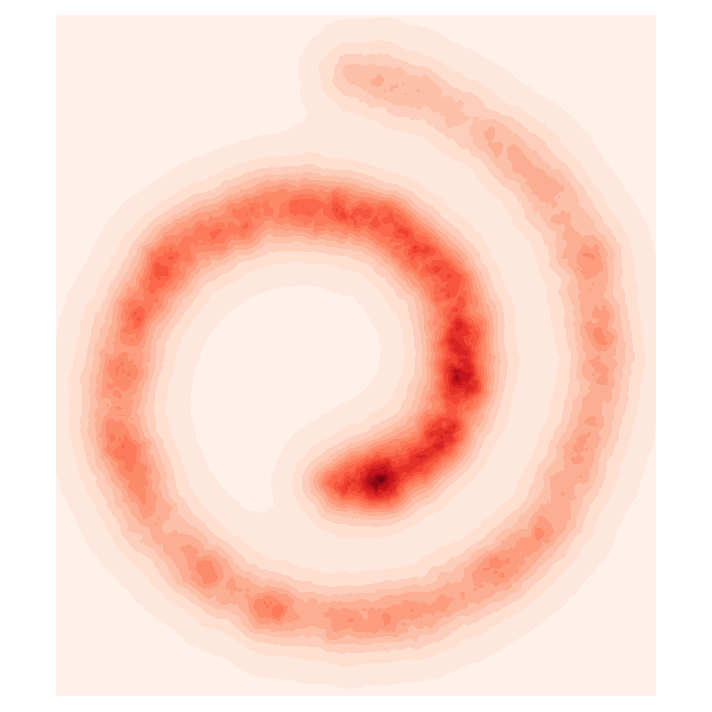

In [12]:
def density(x_train, x_test):
    density = []
    neigh = NearestNeighbors(n_neighbors=math.isqrt(len(x_train))) # ask about rounding 
    neigh.fit(x_train)
    distances, indices = neigh.kneighbors(x_test)
    for test_point in distances:
        # need to find the maximum distance (corresponding to kth point) 
        max_distance = 0
        for distance in test_point:
            if distance > max_distance: max_distance = distance
        # calculating distance using the previously defined expression
        density.append((np.sqrt(len(x_train))-1)/((len(x_train)*np.power(max_distance, 2)*np.pi)))  
    # return a vector of length j with estimated density values
    return density
den = density(roll, queries)
show_density(den)